далили столбцы index и Coordinates;
создали признак средней площади одной комнаты MeanRoomsSquare и ввели коэффициент соотношения площади здания к площади участка — AreaRatio;
преобразовали признак даты продажи Date в формат datetime и создали на его основе следующие столбцы: номер месяц продажи (MonthSale), номер дня недели продажи (WeekdaySale), «признак-мигалку» выходного дня (Weekend);
заменили признак года постройки здания YearBuilt на его возраст AgeBuilding;
извлекли из признака адреса объекта Address новый признак подтипа улицы StreetType и удалили столбец с адресом;
уменьшили число уникальных наименований агентств по недвижимости (SellerG), а также число пригородов (Suburb);
выделили категориальные признаки и преобразовали их в тип данных сategory;
заменили сокращённые названия категорий признака типа объекта Type на их полные названия (h — house, t —  townhouse, u — unit).

In [1]:
import numpy as np
import pandas as pd

In [2]:
melb_df = pd.read_csv('C:\\Users\\User\\Desktop\\ML urfu 2022\\melb_data_fe.csv', sep=',')
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,...,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,...,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


In [3]:
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Suburb           13580 non-null  object 
 1   Rooms            13580 non-null  int64  
 2   Type             13580 non-null  object 
 3   Price            13580 non-null  float64
 4   Method           13580 non-null  object 
 5   SellerG          13580 non-null  object 
 6   Date             13580 non-null  object 
 7   Distance         13580 non-null  float64
 8   Postcode         13580 non-null  int64  
 9   Bedroom          13580 non-null  int64  
 10  Bathroom         13580 non-null  int64  
 11  Car              13580 non-null  int64  
 12  Landsize         13580 non-null  float64
 13  BuildingArea     13580 non-null  float64
 14  CouncilArea      12211 non-null  object 
 15  Lattitude        13580 non-null  float64
 16  Longtitude       13580 non-null  float64
 17  Regionname  

None

братите внимание, что наше преобразование столбцов к типам datetime и category «слетело».

Ответ на самом деле очень прост: csv-файл не хранит в себе информацию о типах данных столбцов, поэтому при чтении Pandas автоматически определяет тип данных столбца. Не забывайте об этом, обмениваясь преобразованными данными с вашими коллегами.

In [4]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst=True)

Преобразуйте столбец Date в формат datetime и выделите квартал (quarter) продажи объектов недвижимости. Найдите второй по популярности квартал продажи. В качестве ответа запишите число объектов, проданных в этом квартале.

In [5]:
melb_df['Date'].dt.quarter.value_counts()

3    4873
2    4359
4    2329
1    2019
Name: Date, dtype: int64

Преобразуйте все столбцы, в которых меньше 150 уникальных значений, в тип данных category, исключив из преобразования столбцы Date, Rooms, Bedroom, Bathroom, Car.
В качестве ответа запишите результирующее количество столбцов, которые имеют тип данных category.

In [6]:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] # список столбцов, которые мы не берём во внимание
max_unique_count = 150 # задаём максимальное число уникальных категорий
for col in melb_df.columns: # цикл по именам столбцов
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: # проверяем условие
        melb_df[col] = melb_df[col].astype('category') # преобразуем тип столбца
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

In [7]:
melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'MeanRoomsSquare', 'AreaRatio', 'MonthSale',
       'AgeBuilding', 'WeekdaySale', 'StreetType', 'Weekend'],
      dtype='object')

In [8]:
melb_df.Suburb.dtype

CategoricalDtype(categories=['Abbotsford', 'Aberfeldie', 'Airport West', 'Albert Park',
                  'Albion', 'Altona', 'Altona North', 'Armadale', 'Ascot Vale',
                  'Ashburton',
                  ...
                  'Thornbury', 'Toorak', 'Viewbank', 'Watsonia', 'Werribee',
                  'West Footscray', 'Williamstown', 'Windsor', 'Yarraville',
                  'other'],
, ordered=False)

In [11]:
(melb_df['Suburb']).dtypes

CategoricalDtype(categories=['Abbotsford', 'Aberfeldie', 'Airport West', 'Albert Park',
                  'Albion', 'Altona', 'Altona North', 'Armadale', 'Ascot Vale',
                  'Ashburton',
                  ...
                  'Thornbury', 'Toorak', 'Viewbank', 'Watsonia', 'Werribee',
                  'West Footscray', 'Williamstown', 'Windsor', 'Yarraville',
                  'other'],
, ordered=False)

In [13]:
k=0
for columns in melb_df.columns:
    if (melb_df[columns].dtypes)=="category":
        k+=1
print(k)

10


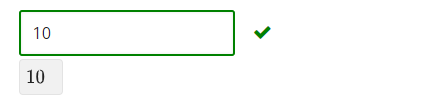

Приведём несколько примеров сортировки нашей таблицы с недвижимостью.

Отсортируем таблицу по возрастанию цены объектов недвижимости (Price):

In [14]:
melb_df.sort_values(by='Price').head(10)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
2652,Footscray,1,unit,85000.0,PI,Burnham,2016-03-09,6.4,3011,1,...,144.89000,Western Metropolitan,7570,42.000000,1.000000,3,9,2,St,0
1805,other,4,house,131000.0,PI,other,2017-02-25,8.9,3162,4,...,145.02420,Southern Metropolitan,2379,17.222222,-0.525994,2,97,5,St,1
7303,Albion,1,unit,145000.0,PI,Biggin,2016-05-28,13.9,3020,2,...,144.82660,Western Metropolitan,2185,31.500000,0.555556,5,46,5,St,1
1927,Coburg,4,house,145000.0,PI,Jellis,2016-04-06,7.8,3058,3,...,144.96580,Northern Metropolitan,11204,20.500000,-0.531429,4,106,2,Rd,0
7940,Hawthorn,1,unit,160000.0,VB,HAR,2017-08-04,4.6,3122,1,...,145.03730,Southern Metropolitan,11308,42.000000,-0.437500,8,8,4,St,0
12666,Brunswick,1,unit,170000.0,VB,Nelson,2017-09-16,5.2,3056,1,...,144.95188,Northern Metropolitan,11918,42.000000,-0.816860,9,47,5,St,1
8811,Footscray,1,unit,170000.0,PI,Burnham,2017-01-07,5.1,3011,1,...,144.89587,Western Metropolitan,7570,8.666667,-0.071429,1,4,5,St,1
8504,West Footscray,1,unit,185000.0,PI,Jas,2017-04-29,8.2,3012,1,...,144.86720,Western Metropolitan,5058,42.000000,1.000000,4,47,5,St,1
7293,Albion,1,unit,185000.0,S,hockingstuart,2016-08-22,13.9,3020,1,...,144.82720,Western Metropolitan,2185,14.333333,-0.964017,8,41,0,Rd,0
7305,Albion,2,unit,190000.0,SP,Burnham,2016-07-30,13.9,3020,2,...,144.82390,Western Metropolitan,2185,25.200000,1.000000,7,46,5,St,1


Мы вывели десять строк таблицы, чтобы убедиться в верном порядке сортировки. Также обратите внимание на индексы таблицы — их значения сохранились из исходной таблицы.

А теперь отсортируем таблицу по убыванию (от самой последней до самой первой) даты продажи объекта (Date). Для этого выставим параметр ascending на False:

Для сортировки по значениям нескольких столбцов необходимо передать названия этих столбцов в параметр by в виде списка. При этом важно обращать внимание на порядок следования столбцов.

Так, например, отсортируем таблицу сначала по возрастанию расстояния от центра города (Distance), а затем — по возрастанию цены объекта (Price). Для того чтобы вывод был более наглядным, выделим каждую десятую строку из столбцов Distance и Price результирующей таблицы:

In [18]:
melb_df.sort_values(by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

,Distance,Price
11428,0.0,387000.0
10512,0.7,600000.0
5727,1.2,485000.0
8671,1.2,595000.0
5736,1.2,740000.0
...,...,...
12011,38.0,680000.0
10673,38.0,810000.0
13429,38.0,1155000.0
11102,41.0,650000.0


Мы получили таблицу, отсортированную по возрастанию расстояния до центра города. Если встречаются объекты недвижимости, у которых расстояние оказывается одинаковым, то внутри такой группы производится сортировка по цене объекта.

Ради интереса попробуйте поменять порядок следования столбцов в параметре by метода sort_values() и сравните результат. 

Предположим, компания McGrath поручила нам восстановить хронологию продаж таунхаусов, у которых площадь участка существенно больше площади здания, чтобы понять, как часто компания справляется с таким сложным видом объектов. Объекты, проданные в один и тот же день, мы бы хотели сортировать по значению коэффициента соотношения площадей. 

Найдём информацию о таунхаусах (Type), проданных компанией (SellerG) McGrath, у которых коэффициент соотношения площадей здания и участка (AreaRatio) меньше -0.8. Результат отсортируем по дате продажи (Date) в порядке возрастания, а после проведём сортировку по убыванию коэффициента соотношения площадей. Также обновим старые индексы на новые, установив параметр ignore_index на True. Для наглядности результата выберем из таблицы только столбцы Data и AreaRatio:

In [21]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


In [22]:
melb_df[mask1 & mask2 & mask3]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
1241,Brighton East,4,townhouse,1367000.0,S,McGrath,2016-07-26,10.7,3187,4,...,145.0222,Southern Metropolitan,6938,0.400000,-0.974922,7,16,1,St,0
2227,Elsternwick,3,townhouse,820000.0,VB,McGrath,2016-12-11,8.5,3185,3,...,145.0012,Southern Metropolitan,4898,0.375000,-0.945946,12,14,6,St,1
2336,Elwood,3,townhouse,920000.0,PI,McGrath,2016-11-27,7.7,3184,3,...,144.9845,Southern Metropolitan,8989,2.250000,-0.953608,11,6,6,St,1
2512,Fairfield,2,townhouse,805000.0,S,McGrath,2016-09-24,5.8,3078,2,...,145.0203,Northern Metropolitan,2970,0.400000,-0.971831,9,8,5,St,1
8031,Kew,3,townhouse,690000.0,S,McGrath,2017-08-04,5.6,3101,3,...,145.0238,Southern Metropolitan,10331,0.428571,-0.947368,8,145,4,Dr,0
8492,West Footscray,3,townhouse,815000.0,S,McGrath,2017-08-04,8.2,3012,3,...,144.8811,Western Metropolitan,5058,0.428571,-0.970874,8,47,4,Rd,0


Произведите сортировку столбца AreaRatio по убыванию. При этом индексы полученной таблицы замените на новые. Какое значение площади здания находится в строке 1558? Ответ округлите до целого числа.

In [25]:
melb_df.sort_values(by=['AreaRatio'],ascending=False, ignore_index=True).iloc[1558]

Suburb                       Elsternwick
Rooms                                  2
Type                               house
Price                           716000.0
Method                                 S
SellerG                    hockingstuart
Date                 2017-03-06 00:00:00
Distance                             7.2
Postcode                            3185
Bedroom                                2
Bathroom                               1
Car                                    1
Landsize                             0.0
BuildingArea                       126.0
CouncilArea                    Glen Eira
Lattitude                      -37.89438
Longtitude                     145.00851
Regionname         Southern Metropolitan
Propertycount                       4898
MeanRoomsSquare                     25.2
AreaRatio                            1.0
MonthSale                              3
AgeBuilding                           47
WeekdaySale                            0
StreetType      

In [28]:
melb_df.sort_values(by=['AreaRatio'],ascending=False, ignore_index=True).loc[1558,"BuildingArea"]

126.0

Найдите таунхаусы (Type) с количеством жилых комнат (Rooms) больше 2. Отсортируйте полученную таблицу сначала по возрастанию числа комнат, а затем по убыванию средней площади комнат (MeanRoomsSquare). Индексы таблицы замените на новые. Какая цена будет у объекта в строке 18? Ответ запишите в виде целого числа.

In [32]:
mask1 = melb_df['Rooms'] > 2
mask2 = melb_df['Type'] == 'townhouse'
melb_df[mask1 & mask2].sort_values(
    by=['Rooms', 'MeanRoomsSquare'],
    ascending=[True, False],
    ignore_index=True
).loc[18,"Price"]

1300000.0

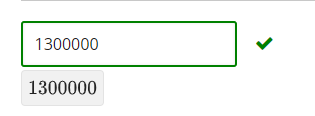

Рассмотрим группировку данных на примере нашей таблицы с недвижимостью.

Применим агрегирующую функцию среднего к результату работы groupby(). В качестве столбца для группировки возьмём столбец типа объекта недвижимости (Type):

In [33]:
melb_df.groupby(by='Type').mean()

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,AgeBuilding
Type,,,,,,,,,,,,,,,
house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,55.669700
townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,26.690305
unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,39.703016


Обратите внимание на структуру получившейся таблицы: теперь на месте индексов стоят значения типа объекта недвижимости Type (house, townhouse, unit).

Примечание. Если мы хотим видеть тип объекта в качестве отдельного столбца таблицы, мы можем выставить параметр as_index на False:



In [34]:
melb_df.groupby(by='Type', as_index=False).mean()

,Type,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,AgeBuilding
0,house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,55.669700
1,townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,26.690305
2,unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,39.703016


Как правило, нам не нужна информация обо всех столбцах, поэтому агрегирующие методы можно применять только к интересующему нас столбцу. Например, давайте сравним средние цены на объекты в зависимости от их типа:

In [35]:
melb_df.groupby('Type')['Price'].mean()

Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

Из этой маленькой таблицы видно, что наибольшей средней ценой обладают объекты типа house (дома, коттеджи, виллы). Следовательно, можно сделать вывод, что тип постройки является значимым фактором при определении цены объекта недвижимости.

Для этого найдём минимальное значение расстояния от центра города до объекта в зависимости от его региона. Результат отсортируем по убыванию расстояния:

In [36]:
melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)

Regionname
Western Victoria              29.8
Eastern Victoria              25.2
Northern Victoria             21.8
South-Eastern Metropolitan    14.7
Eastern Metropolitan           7.8
Western Metropolitan           4.3
Southern Metropolitan          0.7
Northern Metropolitan          0.0
Name: Distance, dtype: float64

Итак, наиболее удалёнными являются все регионы Victoria.

ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С НЕСКОЛЬКИМИ АГРЕГАЦИЯМИ

Чтобы рассчитать несколько агрегирующих методов, можно воспользоваться методом agg(), который принимает список строк с названиями агрегаций.

Давайте построим таблицу для анализа продаж по месяцам. Для этого найдём количество продаж, а также среднее и максимальное значения цен объектов недвижимости (Price), сгруппированных по номеру месяца продажи (MonthSale). Результат отсортируем по количеству продаж в порядке убывания:

In [37]:
melb_df.groupby('MonthSale')['Price'].agg(
    ['count', 'mean', 'max']
).sort_values(by='count', ascending=False)

,count,mean,max
MonthSale,,,
8,1850,1.056371e+06,6500000.0
7,1835,9.314698e+05,9000000.0
5,1644,1.097807e+06,8000000.0
6,1469,1.068981e+06,7650000.0
3,1408,1.146762e+06,5600000.0
4,1246,1.050479e+06,5500000.0
9,1188,1.126349e+06,6400000.0
10,854,1.135970e+06,6250000.0
11,750,1.142503e+06,5050000.0


братите внимание, что, так как мы считаем несколько показателей для одного столбца, в результате мы получаем объект DataFrame.

Примечание. Если вам нужна полная информация обо всех основных статистических характеристиках внутри каждой группы, вы можете воспользоваться методом agg(), передав в качестве его параметра строку 'describe':

In [39]:
melb_df.groupby('MonthSale')['Price'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
MonthSale,,,,,,,,
1,278.0,9.397921e+05,577668.924214,170000.0,570500.0,795000.0,1111250.0,5200000.0
2,333.0,1.169051e+06,671564.357417,131000.0,710000.0,1020000.0,1478000.0,4735000.0
3,1408.0,1.146762e+06,709573.596867,85000.0,680000.0,945000.0,1400000.0,5600000.0
4,1246.0,1.050479e+06,591892.902979,145000.0,655000.0,905500.0,1298750.0,5500000.0
5,1644.0,1.097807e+06,668492.867996,145000.0,650000.0,905000.0,1371250.0,8000000.0
6,1469.0,1.068981e+06,606010.069052,222000.0,660000.0,900000.0,1325000.0,7650000.0
7,1835.0,9.314698e+05,537390.803161,190000.0,586750.0,800000.0,1150000.0,9000000.0
8,1850.0,1.056371e+06,619617.476541,160000.0,635000.0,892000.0,1310000.0,6500000.0
9,1188.0,1.126349e+06,608734.690742,170000.0,725000.0,980000.0,1360000.0,6400000.0


После базовых математических функций наиболее частым агрегированием является подсчёт числа уникальных значений. Так, например, мы можем вычислить число уникальных риелторских компаний в зависимости от региона, чтобы понять, в каких регионах конкуренция на рынке недвижимости меньше. Это можно сделать, передав в параметр метода agg() строку 'nunique'. 

Более того, метод agg() поддерживает использование и других функций. Передадим дополнительно встроенную функцию set, чтобы получить множество из агентств недвижимости, которые работают в каждом из регионов:

In [40]:
melb_df.groupby('Regionname')['SellerG'].agg(
    		['nunique', set]
)

,nunique,set
Regionname,,
Eastern Metropolitan,26,"{Noel, HAR, Marshall, Biggin, Buxton, Barry, o..."
Eastern Victoria,11,"{Eview, other, hockingstuart, HAR, Harcourts, ..."
Northern Metropolitan,40,"{Collins, HAR, Biggin, Marshall, Rendina, Rain..."
Northern Victoria,11,"{hockingstuart, Buckingham, HAR, Raine, McDona..."
South-Eastern Metropolitan,25,"{Noel, HAR, Biggin, Buxton, Greg, Barry, other..."
Southern Metropolitan,38,"{Noel, Collins, HAR, Marshall, Biggin, Rendina..."
Western Metropolitan,34,"{HAR, Village, Biggin, Rendina, Sweeney, Brad,..."
Western Victoria,6,"{hockingstuart, HAR, Raine, YPA, Ray, other}"


Как и ожидалось, наименьшая конкуренция в наиболее удалённом регионе Western Victoria, а наибольшая — в центральном районе Northern Metropolitan.

Методы группировки по одному признаку позволяют посмотреть на наши данные «в разрезе» группирующего признака и понять их взаимосвязь. Далее мы рассмотрим, как оценивать взаимосвязь между большим количеством признаков.

Предлагаем вам самим потренироваться в использовании группировки ↓

Сгруппируйте данные по признаку количества комнат и найдите среднюю цену объектов недвижимости в каждой группе. В качестве ответа запишите количество комнат, для которых средняя цена наибольшая.

In [41]:
melb_df.groupby('Rooms')['Price'].mean().sort_values(ascending=False)

Rooms
7     1.920700e+06
5     1.870260e+06
6     1.849366e+06
8     1.602750e+06
4     1.445282e+06
3     1.076081e+06
10    9.000000e+05
2     7.750812e+05
1     4.338245e+05
Name: Price, dtype: float64

Какой регион имеет наименьшее стандартное отклонение по географической широте (Lattitude)?
В качестве ответа запишите название этого региона.

In [42]:
melb_df.groupby('Regionname')['Lattitude'].std().sort_values()

Regionname
Western Victoria              0.011579
Southern Metropolitan         0.043080
Eastern Metropolitan          0.047890
Northern Metropolitan         0.049639
Western Metropolitan          0.051251
South-Eastern Metropolitan    0.073411
Northern Victoria             0.084455
Eastern Victoria              0.147067
Name: Lattitude, dtype: float64

Какая риелторская компания (SellerG) имеет наименьшую общую выручку за период с 1 мая по 1 сентября (включительно) 2017 года?
Для ответа на этот вопрос рассчитайте сумму продаж (Price) каждой компании в заданный период.
Не забудьте перевести даты в формат datetime.

In [47]:
date1 = pd.to_datetime('2017-05-01')
date2 = pd.to_datetime('2017-09-01')
mask = (date1 <= melb_df['Date']) & (melb_df['Date']<= date2)
melb_df[mask].groupby('SellerG')['Price'].sum().sort_values(ascending=True).nsmallest(4)

SellerG
LITTLE     2742000.0
Cayzer     4439000.0
Burnham    4550500.0
Moonee     7328000.0
Name: Price, dtype: float64